# 1. Análisis de Componentes Principales (PCA)

PCA es una técnica de aprendizaje no supervisado que tiene como objetivo fundamental la reducción de dimensiones. 
Tiene una variedad de aplicaciones:
1. Reducción de la dimensionalidad
2. Visualización
3. Eliminar el ruido
4. Generar nuevos features en el dataset

##  Reducción de la dimensionalidad

Vamos a generar algunos puntos en dos dimensiones para tratar de dar una intuición acerca del funcionamiento de PCA.

# <center>
<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR_z4GT2bY3HmLtHlRmRVm1oygMgUUvz6o8ryX3vAMo65iIftAD'>


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import datasets
import pandas as pd

In [3]:
#Importamos IRIS data set
iris_dataset = datasets.load_iris()

Dado que este dataset ya está "formateado" del modo que `sklearn` necesita, es posible utilizar los métodos que tiene este objeto para ver la información:

In [4]:
iris_dataset.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [5]:
iris_dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
y = iris_dataset.target

In [7]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

===================================================================================================================
**Notar** que _target_ es la variable categórica que nos indica a que tipo de especie pertenece:

* 0 --->  'setosa' 
* 1 --->  'versicolor'
* 2 --->  'virginica' 


=====================================================================================================================

Usando Pandas nos armamos un DataFrame del estilo (ejemplo de forma)


SepalLength |	SepalWidth	|PetalLength|	PetalWidth|	Name_num
---------------|------------|------------|--------------|------------
5.1|3.5|1.4|0.2|0
4.9|3.0|1.4|0.2|0
4.7|3.2|1.3|0.2|1
4.6|3.1|1.5|0.2|2
5.0|3.6|1.4|0.2|0
...|...|...|...|...

In [8]:
#Armamos las primeras cuatro columnas
df = pd.DataFrame(iris_dataset.data,  columns=['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'])

#Le agregamos la columna 'name_num' con los valores de la variable "target"
df['name_num']=iris_dataset.target

#Revisamos las primeras filas
df.head(n=5)

,SepalLength,SepalWidth,PetalLength,PetalWidth,name_num
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
df.shape

(150, 5)

Ahora vamos a plotear los datos para ver las distribuciones:

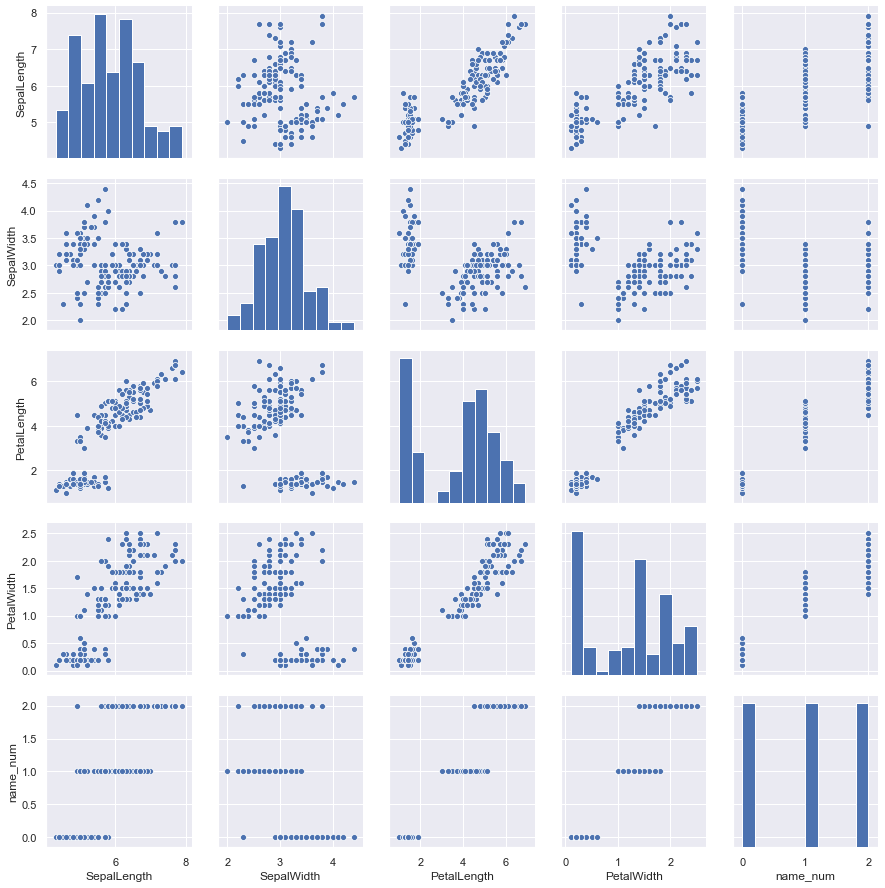

In [10]:
sns.pairplot(df)

In [11]:
df.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'name_num'], dtype='object')

In [12]:
X = df.drop('name_num',axis= 1)

In [13]:
from sklearn.decomposition import PCA

In [14]:
help(PCA)

Help on class PCA in module sklearn.decomposition._pca:

class PCA(sklearn.decomposition._base._BasePCA)
 |  PCA(n_components=None, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)
 |  
 |  Principal component analysis (PCA).
 |  
 |  Linear dimensionality reduction using Singular Value Decomposition of the
 |  data to project it to a lower dimensional space. The input data is centered
 |  but not scaled for each feature before applying the SVD.
 |  
 |  It uses the LAPACK implementation of the full SVD or a randomized truncated
 |  SVD by the method of Halko et al. 2009, depending on the shape of the input
 |  data and the number of components to extract.
 |  
 |  It can also use the scipy.sparse.linalg ARPACK implementation of the
 |  truncated SVD.
 |  
 |  Notice that this class does not support sparse input. See
 |  :class:`TruncatedSVD` for an alternative with sparse data.
 |  
 |  Read more in the :ref:`User Guide <PCA>`.
 |  
 |  Pa

In [ ]:
X.shape

In [ ]:
PCA()

In [1]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

NameError: name 'X' is not defined

Cada fila de esta matriz, representa un vector. Los vectores son ortogonales entre sí.

In [ ]:
print(pca.components_)

In [ ]:
print(pca.components_)

Veamos la varianza capturada por cada uno de los componentes (en relativos). ¿Cuánto deberían sumar la proporción de varianza explicada por estos dos componentes?

In [ ]:
pca.explained_variance_ratio_

## 2. PCA para visualización

En algunos casos tenemos conjuntos de datos con muchas variables. 
En general, es difícil representar estos datos en un gráfico para ver si se encuentran dispersos, cercanos, agrupados, etc.

Graficar los componentes principales permite una visualización en estos casos.

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss_cluster = ss.fit_transform(X)

In [ ]:
pca = PCA().fit(ss_cluster)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
#plt.ylim(0,1)
plt.ylabel('cumulative explained variance');

In [ ]:

pca = PCA(n_components=2)
pca.fit_transform(ss_cluster.transpose())

principalDf = pd.DataFrame(data = pca.components_ ).transpose()
principalDf.columns = ['pc1','pc2']
principalDf['clase'] = df.name_num

In [ ]:
plt.figure(figsize=(15,15))

sns.relplot(x ='pc1',y='pc2', data=principalDf, hue='clase', 
            palette=['royalblue','rebeccapurple','orange'],s=200)
plt.show()

# 3. Clustering  K-means

### Introducción

**Objetivo:** Realizar una análisis de clustering a partir del algoritmo _k-means_ utilizando el viejo y ya ampliamente conocido dataset de _iris_

Primero vamos a importar las librerías necesarias:

In [ ]:
%matplotlib inline

import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import cluster, datasets
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

Usaremos **Scikit-Learn** para nuestro análisis

## 3.2. Implementando el clustering

#### Antes de realizar la prueba de k-means, todavía hay algunas transformaciones que hacer:

Convertimos nuestros datos en un Numpy Array:

Ya estamos listos! (¿podriamos haber obtenido la matriz de otra forma?)
> Respuesta: Sí... `dn2 = np.array(df)`

Ahora que hemos formateado nuestros datos y hemos comprendido sus estructuras, finalmente podemos ir y agrupar.

Vamos a establecer __k=2__ dado el comportamiento que vimos arriba en nuestros gráficos.

In [ ]:
k = 2
kmeans = cluster.KMeans(n_clusters=k, random_state=0) #Como siempre, suele ser una buena práctica fijar la semilla
kmeans.fit(df.drop('name_num',axis=1))

Podemos utilizar las funciones integradas de Scikit para determinar las ubicaciones de los centroides y sus etiquetas:

In [ ]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [ ]:
dn = df.values

In [ ]:
df.columns

In [ ]:
kmeans.cluster_centers_

## 3.3 Visualizando los clusters

In [ ]:
plt.figure(figsize=(12, 12))

ax1=plt.subplot(221)
#puntos
ax1.scatter(dn[:, 0], dn[:, 1], c=labels,alpha=0.5,s=30)
#centroides
ax1.scatter(centroids[0][0],centroids[0][1], c='g',s=200,marker=u'^')
ax1.scatter(centroids[1][0],centroids[1][1], c='g',s=200,marker=u'^')

ax1.set_xlabel('SepalLength')
ax1.set_ylabel('Sepal width')

ax2=plt.subplot(222)
#puntos
ax2.scatter(dn[:, 0], dn[:, 2], c=labels,alpha=0.5,s=30)
#centroides
ax2.scatter(centroids[0][0],centroids[0][2], c='g',s=200,marker=u'^')
ax2.scatter(centroids[1][0],centroids[1][2], c='g',s=200,marker=u'^')

ax2.set_xlabel('SepalLength')
ax2.set_ylabel('PetalLength')

ax3=plt.subplot(223)
#puntos
ax3.scatter(dn[:, 0], dn[:, 3], c=labels,alpha=0.5,s=30)
#centroides
ax3.scatter(centroids[0][0],centroids[0][3], c='g',s=200,marker=u'^')
ax3.scatter(centroids[1][0],centroids[1][3], c='g',s=200,marker=u'^')

ax3.set_xlabel('SepalLength')
ax3.set_ylabel('PetalWidth')

ax4=plt.subplot(224)
#puntos
ax4.scatter(dn[:, 1], dn[:, 3], c=labels,alpha=0.5,s=30)
#centroides
ax4.scatter(centroids[0][1],centroids[0][3], c='g',s=200,marker=u'^')
ax4.scatter(centroids[1][1],centroids[1][3], c='g',s=200,marker=u'^')

ax4.set_xlabel('SepalWidth')
ax4.set_ylabel('PetalWidth')

## 3.4. Evaluando los clusters

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


#X = cluster.drop(['categorization_tier_3','incident_number_count'],axis = 1)

X = df.drop('name_num',axis=1)#,'max_proporcion']]
X = ss.fit_transform(X)
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10 , 11, 12, 13 , 14 , 15]

for n_clusters in range_n_clusters:


    # Inicializar el cluster con n_clusters
    # random_state en 10 para hacerlo reproducible
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)


In [ ]:
kmeans = KMeans(n_clusters=2,random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)


In [ ]:
principalDf['cluster'] =  y_kmeans
df['cluster'] = y_kmeans

In [ ]:
plt.figure(figsize=(15,15))

sns.relplot(x ='pc1',y='pc2', data=principalDf,hue='cluster',palette=['royalblue','rebeccapurple'],s=200)
plt.show()

# 4. DBSCAN

Para implementar DBSCAN primero importamos los paquetes necesarios de `sklearn` y los datos con los que trabajarmos: los viejos y conocidos datos de iris

## Introducción: importando datos

In [ ]:
from sklearn.cluster import DBSCAN, KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [ ]:
data = load_iris()

In [ ]:
X, y = data.data, data.target

## Desarrollo

### Estandarizamos las variables 

In [ ]:
X = StandardScaler().fit_transform(X)

In [ ]:
X.shape

### Generamos los clusters y extraemos las etiquetas

Implementamos `DBSCAN`

In [ ]:
dbscn = DBSCAN(eps = 0.8, min_samples = 7).fit(X)

Aquí seteamos un valor de epsilon (`eps`) 0.8 y el mínimo de puntos (`min_samples`) a 7.

Como regla general al elegir el mínimo de pntos, siempre se debería tratar de setear este parámetro en un valor igual o mayor al número de dimensiones en los datos más uno. Epsilon es un poco mpas complejo y usa un método llamado k-distancias, que puede ayudar a visualizar el mejor epsilon. Vamos a ver de qué forma diferentes valores de epsilon afectan los resultados.

In [ ]:
core_samples = dbscn.core_sample_indices_
labels = dbscn.labels_  

El algoritmo DBSCAN en `sklearn` devuelve dos elementos:
    
   - `core_samples`: son los índices de puntos alrededor de los que el algoritmo busca para formar los clusters
   - `labels` :las etiquetas
   - `components`: es una copia de los registros del dataset original que coincide con las core samples

#### ¿Cuántos puntos "ruidosos" hay en el dataset?

In [ ]:
labels = dbscn.labels_
core_samples_mask = np.zeros_like(labels, dtype=bool) # Generamos un array lleno de 0's del mismo shape que `labels`
core_samples_mask[dbscn.core_sample_indices_] = True # Para aquellos que formen parte de los índices de core sample ponemos True

np.sum(labels == -1)

####  ¿Cuántos clusters se generaron?

In [ ]:
n_clusters_ = np.unique([l for l in labels if l != -1]).shape[0]
print('Number of clusters: ', n_clusters_)

## Evaluando la performance de DBSCAN

Podemos usar estos comandos para evaluar la performance de DBSCAN. Una aclaración: como podrán ver, hemos usado las medidas que hemos visto la clase pasada. Pueden investigar muchas otras medidas en la documentación de [Scikit-Learn](http://scikit-learn.org/stable/modules/clustering#clustering-performance-evaluation).

In [ ]:
def eval_dbscan(n_clusters, X, y, labels):
    print('Estimated number of clusters: %d' % n_clusters), "\n"
    print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

In [ ]:
eval_dbscan(n_clusters_, X, y, labels)

** Ploteamos los resultados **

Graficamos los resultados: la idea es poder visualizar de forma diferenciada los puntos. 

- los colores diferencian los clusters
- en círculos coloreados grandes veremos los "core points"
- en cŕiculos coloreados pequeños, los "reacheable points"
- en círculos pequeños negros, los puntos ruidosos

In [ ]:
# Generamos una paleta de colores

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

In [ ]:
xy

In [ ]:
# Iteramos sobre las etiquetas únicas y sobre los colores
#### Si es un caso ruidoso (k=-1) le asigamos el color negro
#### Si no, subseteamos el array con los datos en función de la etiqueta y si es o no un punto núcleo
#### Si es un punto núcleo, lo ploteamos tamaño grande
#### Si NO es un punto núcleo, lo ploteamos tamaño pequeño
#### Los colores representan los clusters

plt.figure(figsize=[8,8])
for k, col in zip(unique_labels, colors):
    if k == -1:         
        col = [0, 0, 0, 1]
    class_member_mask = (labels == k)
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=10)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()